In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Load your data
df = pd.read_csv('weather.csv')

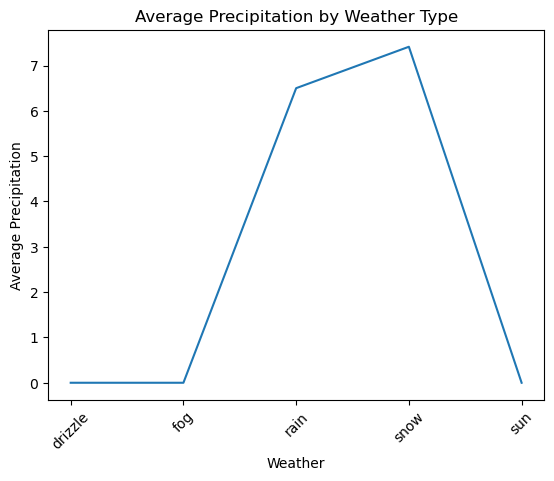

In [4]:
# Group by 'weather' and calculate mean precipitation for each type
weather_precipitation = df.groupby('weather')['precipitation'].mean()

# Plot
plt.plot(weather_precipitation.index, weather_precipitation.values)
plt.xlabel('Weather')
plt.ylabel('Average Precipitation')
plt.title('Average Precipitation by Weather Type')
plt.xticks(rotation=45)
plt.show()

In [5]:
(df['weather']=='fog').sum()
len(df)

4320

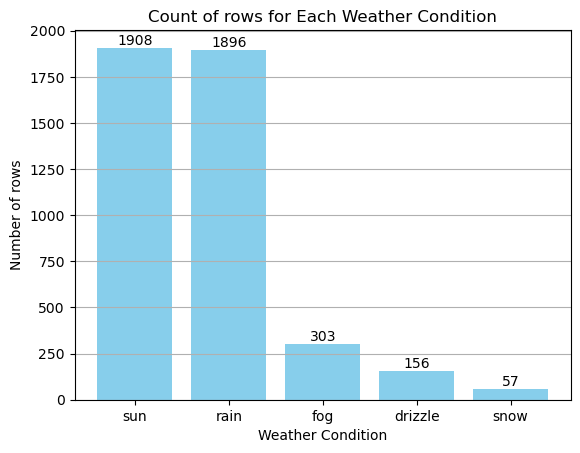

In [6]:
weather_counts = df['weather'].value_counts()

# Create a bar plot
plt.bar(weather_counts.index, weather_counts, color='skyblue')

# Add data labels
for i, value in enumerate(weather_counts):
    plt.text(i, value , str(value), ha='center', va='bottom')
#Customize the plot
plt.title('Count of rows for Each Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of rows')
plt.grid(axis='y')

C:\Users\hp\AppData\Local\Temp\ipykernel_13548\3548598376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='precipitation', data=df, palette='Set2')


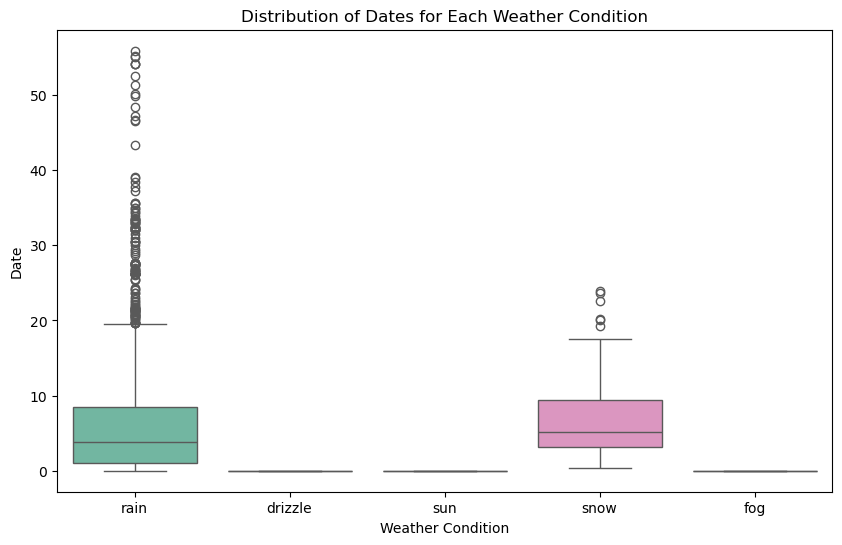

In [7]:
# Boxplot - Distribution of dates for each weather condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='precipitation', data=df, palette='Set2')
plt.title('Distribution of Dates for Each Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Date')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13548\3101602706.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=df, palette='viridis')


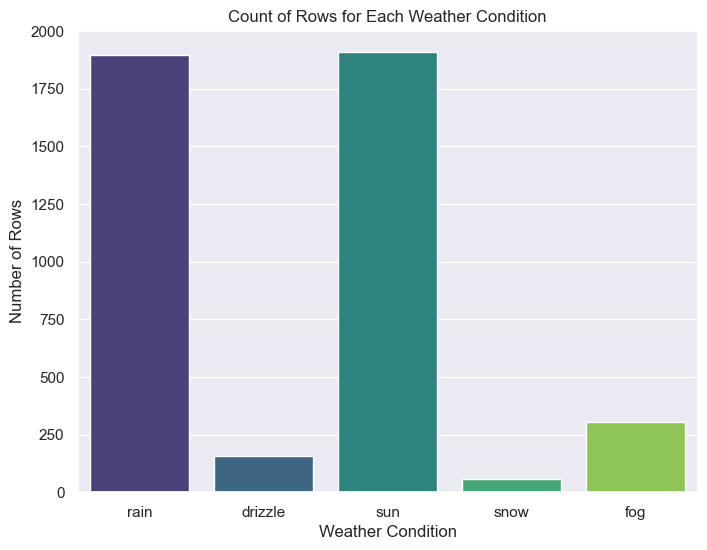

In [8]:
# Set the default Seaborn theme
sns.set_theme()

# Countplot - Count of rows for each weather condition
plt.figure(figsize=(8, 6))
sns.countplot(x='weather', data=df, palette='viridis')
plt.title('Count of Rows for Each Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Rows')
plt.show()

In [9]:
# Prepare the feature matrix (X) and target vector (y)
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

In [10]:
# Split the data (training and testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# Predict the weather for the test data
y_pred = clf.predict(X_test)

In [13]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8719135802469136


In [14]:
import pickle
filename= 'goodmodel.sav'
pickle.dump(clf,open(filename,'wb'))

In [15]:
print("Accuracy: ",accuracy_score(y_test, y_pred) * 100 )

Accuracy:  87.19135802469135


In [16]:
load_model = pickle.load(open(filename,'rb'))

In [17]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['rain'], dtype=object)